# Importing and Reading Files

In [1]:
import geopy 
from geopy.geocoders import Nominatim 
import time
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#main housing data
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
## Do an inner join and groupby on this
#first import zipcode csv from king co website
dfz = pd.read_csv('data/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv')

# Preliminary Exploration and Data Cleaning

In [4]:
df[df.duplicated(keep=False)].sort_values(by='address').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [5]:
# source : https://www.zillow.com/browse/homes/wa/king-county/
KCoZips =  [98052, 98092, 98115, 98103, 98003, 98023, 98105, 98042, 98034, 98133, 98118, 98125, 98058, 
            98031, 98122, 98033, 98032, 98004, 98059, 98001, 98006, 98056, 98030, 98155, 98168, 98117, 
            98002, 98198, 98038, 98029, 98027, 98109, 98074, 98144, 98007, 98040, 98072, 98146, 98011, 
            98107, 98106, 98188, 98008, 98178, 98108, 98075, 98028, 98112, 98119, 98055, 98053, 98102, 
            98022, 98126, 98116, 98005, 98121, 98199, 98177, 98166, 98136, 98045, 98077, 98101, 98057,
            98065, 98104, 98019, 98148, 98014, 98354, 98070, 98010, 98024, 98051, 98047, 98151, 98251,
            98134, 98039, 98195, 98158, 98154, 98161, 98174, 98068, 98256, 98288, 98050, 98132, 98171,
            98184, 98054, 98164, 98181, 98224, 98191, 98009, 98013, 98015, 98025, 98035, 98041, 98062, 
            98064, 98063, 98071, 98073, 98083, 98089, 98093, 98111, 98113, 98114, 98124, 98127, 98131, 
            98129, 98139, 98138, 98141, 98145, 98160, 98165, 98170, 98175, 98185, 98190, 98194, 98471,
            98481]

In [6]:
len(KCoZips)

131

In [91]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df['address']
#looks like there are addresses from outside of King County

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
5        1602 North 185th Street, Shoreline, Washington...
6        2633 Southwest 164th Place, Burien, Washington...
7        24913 122nd Place Southeast, Kent, Washington ...
8        2721 Southwest 343rd Place, Federal Way, Washi...
9        27950 Northeast 147th Circle, Duvall, Washingt...
11       3408 Beacon Avenue South, Seattle, Washington ...
12       20432 130th Place Southeast, Kent, Washington ...
13       2634 57th Street Southeast, Auburn, Washington...
15       1781 Southwest 345th Place, Federal Way, Washi...
16       927 North 91st Street, Seattle, Washington 981...
17       11620 Southeast 47th Place, Bellevue, Washingt...
18       Fauntleroy Way Southwest, Seattle, Washington .

In [8]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
dfz.head()

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAME,PREFERRED_CITY,Shape_Length,Shape_Area
0,1,98001,98001,33,Standard,King County,AUBURN,147643.355747,5.253133e+08
1,2,98002,98002,33,Standard,King County,AUBURN,104440.086791,2.053028e+08
2,3,98003,98003,33,Standard,King County,FEDERAL WAY,123619.720418,3.169395e+08
3,4,98004,98004,33,Standard,King County,BELLEVUE,109051.119162,2.017598e+08
4,5,98005,98005,33,Standard,King County,BELLEVUE,116554.737369,2.114337e+08


In [12]:
df['coords'] = list(zip(df['lat'],df['long']))

In [13]:
df['zipcodes'] = df['address'].apply(lambda x: x[-20:-15])

In [14]:
# zipcodes in King Co imported table in integer format, but string in our dataframe
# need to convert zipcode column into integer
df['zipcodes'] = df['zipcodes'].apply(lambda x: int(x))

In [15]:
df['zipcodes'].value_counts()

98042    992
98038    858
98103    761
98115    761
98117    748
        ... 
68504      1
80210      1
50161      1
68632      1
58042      1
Name: zipcodes, Length: 399, dtype: int64

In [16]:
df = df[df['zipcodes'].isin(KCoZips)]

In [17]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,coords,zipcodes
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,"(47.461975, -122.19052)",98055
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,"(47.711525, -122.35591)",98133
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,"(47.502045, -122.2252)",98178
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,"(47.56611, -122.2902)",98118
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,"(47.53247, -122.07188)",98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,2021-11-30,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,"(47.66474, -122.3294)",98103
30151,194000695,2021-06-16,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,"(47.56561, -122.38851)",98116
30152,7960100080,2022-05-27,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,"(47.610395, -122.29585)",98122
30153,2781280080,2022-02-24,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,"(47.44949, -122.18908)",98055


In [18]:
dfz = dfz[['ZIPCODE', 'PREFERRED_CITY']]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29215 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29215 non-null  int64         
 1   date           29215 non-null  datetime64[ns]
 2   price          29215 non-null  float64       
 3   bedrooms       29215 non-null  int64         
 4   bathrooms      29215 non-null  float64       
 5   sqft_living    29215 non-null  int64         
 6   sqft_lot       29215 non-null  int64         
 7   floors         29215 non-null  float64       
 8   waterfront     29215 non-null  object        
 9   greenbelt      29215 non-null  object        
 10  nuisance       29215 non-null  object        
 11  view           29215 non-null  object        
 12  condition      29215 non-null  object        
 13  grade          29215 non-null  object        
 14  heat_source    29186 non-null  object        
 15  sewer_system   2920

In [20]:
# mergeeeee
df = df.merge(dfz, how = 'left', left_on = 'zipcodes', right_on = 'ZIPCODE')

In [21]:
# WE REDUCED OUR CATEGORICALS TO 40 FROM 400

In [22]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31737 entries, 0 to 31781
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              31737 non-null  int64         
 1   date            31737 non-null  datetime64[ns]
 2   price           31737 non-null  float64       
 3   bedrooms        31737 non-null  int64         
 4   bathrooms       31737 non-null  float64       
 5   sqft_living     31737 non-null  int64         
 6   sqft_lot        31737 non-null  int64         
 7   floors          31737 non-null  float64       
 8   waterfront      31737 non-null  object        
 9   greenbelt       31737 non-null  object        
 10  nuisance        31737 non-null  object        
 11  view            31737 non-null  object        
 12  condition       31737 non-null  object        
 13  grade           31737 non-null  object        
 14  heat_source     31737 non-null  object        
 15  se

In [23]:
df[df.duplicated(keep=False)].sort_values(by='address').shape

(5126, 29)

In [24]:
df = df.drop_duplicates(subset=['address'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29015 entries, 0 to 31781
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              29015 non-null  int64         
 1   date            29015 non-null  datetime64[ns]
 2   price           29015 non-null  float64       
 3   bedrooms        29015 non-null  int64         
 4   bathrooms       29015 non-null  float64       
 5   sqft_living     29015 non-null  int64         
 6   sqft_lot        29015 non-null  int64         
 7   floors          29015 non-null  float64       
 8   waterfront      29015 non-null  object        
 9   greenbelt       29015 non-null  object        
 10  nuisance        29015 non-null  object        
 11  view            29015 non-null  object        
 12  condition       29015 non-null  object        
 13  grade           29015 non-null  object        
 14  heat_source     29015 non-null  object        
 15  se

# Data Exploration

In [25]:
X = df.drop(columns = ['price'])
y = df['price']

In [26]:
X.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zipcodes,ZIPCODE
id,1.000000,-0.006043,-0.013962,-0.028218,-0.121127,0.032791,-0.022402,-0.016232,-0.007142,-0.043077,0.020605,-0.028657,-0.001818,0.009800,-0.004192,-0.004192
bedrooms,-0.006043,1.000000,0.594510,0.629503,-0.000756,0.206114,0.536092,0.234312,0.302579,0.193138,0.188908,0.010440,-0.017253,0.130621,-0.159889,-0.159889
bathrooms,-0.013962,0.594510,1.000000,0.780958,0.038990,0.433211,0.681687,0.260994,0.461847,0.334317,0.457914,0.043147,0.045854,0.178014,-0.179152,-0.179152
sqft_living,-0.028218,0.629503,0.780958,1.000000,0.118097,0.368062,0.881266,0.335763,0.501736,0.407442,0.335366,0.035172,0.048289,0.230625,-0.191074,-0.191074
sqft_lot,-0.121127,-0.000756,0.038990,0.118097,1.000000,-0.018161,0.128033,0.001942,0.084134,0.157526,0.014437,0.007379,-0.073750,0.182678,-0.095724,-0.095724
floors,0.032791,0.206114,0.433211,0.368062,-0.018161,1.000000,0.518943,-0.241797,0.190244,0.124782,0.515694,-0.013332,0.043654,0.097289,-0.042282,-0.042282
sqft_above,-0.022402,0.536092,0.681687,0.881266,0.128033,0.518943,1.000000,-0.074724,0.552206,0.322274,0.435209,0.006848,-0.023563,0.335617,-0.262618,-0.262618
sqft_basement,-0.016232,0.234312,0.260994,0.335763,0.001942,-0.241797,-0.074724,1.000000,0.015415,0.214800,-0.225876,0.052351,0.189264,-0.223557,0.162453,0.162453
sqft_garage,-0.007142,0.302579,0.461847,0.501736,0.084134,0.190244,0.552206,0.015415,1.000000,0.229089,0.505586,-0.105415,-0.131351,0.374833,-0.360266,-0.360266
sqft_patio,-0.043077,0.193138,0.334317,0.407442,0.157526,0.124782,0.322274,0.214800,0.229089,1.000000,0.136616,0.058015,0.011563,0.122668,-0.106212,-0.106212


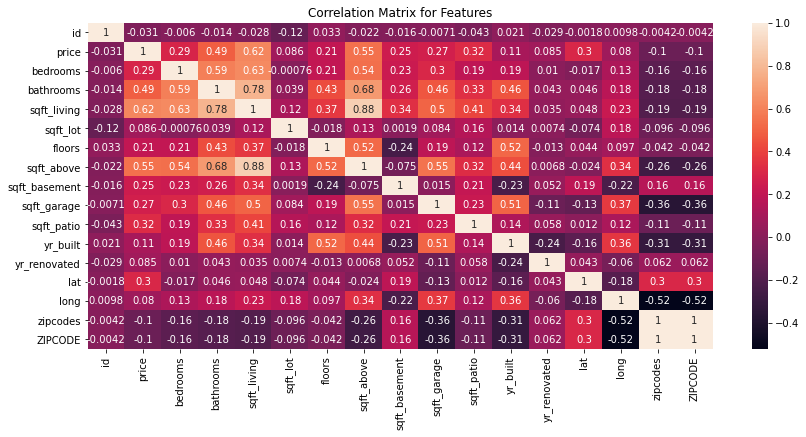

In [27]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

In [28]:
# THIS IS MY BASE MODEL

X = df[['sqft_living']]
y = df['price']

from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.3803731090091207

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

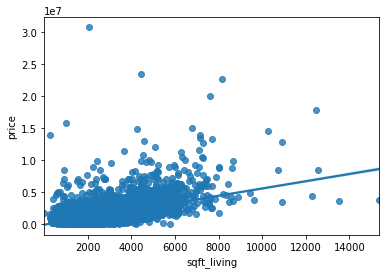

In [29]:
sns.regplot(x =df['sqft_living'],y = df['price'])

In [ ]:
sns.pairplot(df)

In [ ]:
sns.histplot(data = df['bedrooms'])

# Data Cleaning

In [30]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,coords,zipcodes,ZIPCODE,PREFERRED_CITY
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,"(47.461975, -122.19052)",98055,98055,RENTON
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,"(47.711525, -122.35591)",98133,98133,SEATTLE
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,"(47.502045, -122.2252)",98178,98178,SEATTLE
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,"(47.56611, -122.2902)",98118,98118,SEATTLE
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,"(47.53247, -122.07188)",98027,98027,ISSAQUAH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31777,7834800180,2021-11-30,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,"(47.66474, -122.3294)",98103,98103,SEATTLE
31778,194000695,2021-06-16,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,"(47.56561, -122.38851)",98116,98116,SEATTLE
31779,7960100080,2022-05-27,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,"(47.610395, -122.29585)",98122,98122,SEATTLE
31780,2781280080,2022-02-24,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,"(47.44949, -122.18908)",98055,98055,RENTON


# Ordinal Encoding

In [31]:
df['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [32]:
df['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [33]:
df['view'].unique()

array(['NONE', 'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD'], dtype=object)

In [34]:
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [35]:
df['nuisance'].unique()

array(['NO', 'YES'], dtype=object)

In [36]:
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['view'] = df['view'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['nuisance'] = df['nuisance'].astype('category')

In [37]:
df['condition'] = df['condition'].cat.reorder_categories(['Poor', 'Fair', 'Average','Good', 'Very Good'])
df['grade'] = df['grade'].cat.reorder_categories(['2 Substandard', '3 Poor', '4 Low', '5 Fair', 
                                                  '6 Low Average', '7 Average', '8 Good', '9 Better',
                                                  '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])
df['view'] = df['view'].cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])
df['waterfront'] = df['waterfront'].cat.reorder_categories(['NO', 'YES'])
df['nuisance'] = df['nuisance'].cat.reorder_categories(['NO', 'YES'])

In [38]:
print(df['grade'].cat.codes)
print(df['condition'].cat.codes)
print(df['view'].cat.codes)
print(df['waterfront'].cat.codes)
print(df['nuisance'].cat.codes)

0        5
1        5
2        5
3        7
4        5
        ..
31777    6
31778    5
31779    5
31780    6
31781    5
Length: 29015, dtype: int8
0        3
1        2
2        2
3        2
4        2
        ..
31777    3
31778    2
31779    2
31780    2
31781    2
Length: 29015, dtype: int8
0        0
1        2
2        2
3        2
4        0
        ..
31777    0
31778    1
31779    0
31780    0
31781    0
Length: 29015, dtype: int8
0        0
1        0
2        0
3        0
4        0
        ..
31777    0
31778    0
31779    0
31780    0
31781    0
Length: 29015, dtype: int8
0        0
1        1
2        0
3        0
4        1
        ..
31777    0
31778    0
31779    1
31780    0
31781    0
Length: 29015, dtype: int8


In [39]:
ord_cat_selector = ['condition', 'grade', 'view', 'waterfront', 'nuisance']
cat_subset = df[ord_cat_selector]
grade_ls = ['2 Substandard', '3 Poor', '4 Low', '5 Fair', 
            '6 Low Average', '7 Average', '8 Good', '9 Better',
            '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
cond_ls = ['Poor', 'Fair', 'Average','Good', 'Very Good']
view_ls = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
wf_ls = ['NO', 'YES']
nuisance_ls = ['NO', 'YES']
o_enc = OrdinalEncoder(categories = [cond_ls, grade_ls, view_ls, wf_ls, nuisance_ls])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['2 Substandard', '3 Poor', '4 Low', '5 Fair',
                            '6 Low Average', '7 Average', '8 Good', '9 Better',
                            '10 Very Good', '11 Excellent', '12 Luxury',
                            '13 Mansion'],
                           ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'],
                           ['NO', 'YES'], ['NO', 'YES']])

In [40]:
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)

In [41]:
o_enc.inverse_transform(X_subset)

array([['Good', '7 Average', 'NONE', 'NO', 'NO'],
       ['Average', '7 Average', 'AVERAGE', 'NO', 'YES'],
       ['Average', '7 Average', 'AVERAGE', 'NO', 'NO'],
       ...,
       ['Average', '7 Average', 'NONE', 'NO', 'YES'],
       ['Average', '8 Good', 'NONE', 'NO', 'NO'],
       ['Average', '7 Average', 'NONE', 'NO', 'NO']], dtype=object)

In [42]:
X_subset = X_subset.rename(columns = {'condition': 'house_cond','grade':'grade2', 
                                      'view':'view2', 'waterfront': 'wf2', 'nuisance':'nuisance2'}) 

In [43]:
df1 = pd.concat([df.reset_index(), X_subset], axis =1)

In [44]:
df1.columns

Index(['index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'coords', 'zipcodes',
       'ZIPCODE', 'PREFERRED_CITY', 'house_cond', 'grade2', 'view2', 'wf2',
       'nuisance2'],
      dtype='object')

# Test Train Split and LR Score

In [45]:
lr = LinearRegression()
lr

LinearRegression()

In [46]:
# removed id, price, ZIPCODE, address, lat, long
col_selector = ['house_cond', 'grade2', 'sqft_living', 'sqft_above', 'sqft_basement', 'bedrooms', 
                'yr_built', 'yr_renovated', 'zipcodes', 'nuisance2', 'view2', 'wf2']
X = df1[col_selector]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
lr.score(X_train,y_train)

0.502825060513557

In [49]:
print(len(X_train))
print(len(X_test))

20310
8705


# Nominal Encoding

In [50]:
numeric_cols= ['house_cond', 'grade2', 'sqft_living', 'sqft_above', 'sqft_basement', 'bedrooms', 
                'yr_built', 'yr_renovated', 'zipcodes', 'nuisance2', 'view2', 'wf2']
ss = preprocessing.StandardScaler()


ss.fit(X_train[numeric_cols])

X_stan_train = ss.transform(X_train[numeric_cols])
X_stan_test = ss.transform(X_test[numeric_cols])

X_dfstan_train = pd.DataFrame(X_stan_train, columns = numeric_cols)
X_dfstan_test = pd.DataFrame(X_stan_test, columns = numeric_cols)
                              

In [51]:
df1.columns

Index(['index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'coords', 'zipcodes',
       'ZIPCODE', 'PREFERRED_CITY', 'house_cond', 'grade2', 'view2', 'wf2',
       'nuisance2'],
      dtype='object')

In [84]:
col_selector = ['house_cond', 'grade2', 'sqft_living', 'sqft_above', 'sqft_basement', 'bedrooms', 
                'yr_built', 'yr_renovated', 'zipcodes', 'nuisance2', 'view2', 'wf2', 'PREFERRED_CITY']
X = df1[col_selector]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [85]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [86]:
nominal_cols = ['PREFERRED_CITY']

In [87]:
ohe.fit(X_train[nominal_cols])
ohe_train = ohe.transform(X_train[nominal_cols])
ohe_test = ohe.transform(X_test[nominal_cols])


ohe_train= pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

In [88]:
X_train_ohe =pd.concat([X_train.drop(columns = 'PREFERRED_CITY').reset_index(),
                        ohe_train],1)


X_test_ohe =pd.concat([X_test.drop(columns = 'PREFERRED_CITY').reset_index(),
                        ohe_test],1)

In [89]:
lr = LinearRegression()
lr.fit(X_train_ohe, y_train)

lr.score(X_test_ohe, y_test)

0.5790917652979846